# Data Cleaning Project

# This notebook walks through the process of cleaning a dataset using Python and pandas. The steps include handling missing values, removing duplicates, correcting data types, and preparing the data for analysis.


In [9]:
##Importing Libraries
## Here we import the necessary Python libraries for data manipulation and analysis.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [10]:
df=pd.read_csv('cafe_sales.csv')
df.head(10)

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11
5,TXN_2602893,Smoothie,5,4.0,20.0,Credit Card,NaN,2023-03-31
6,TXN_4433211,UNKNOWN,3,3.0,9.0,ERROR,Takeaway,2023-10-06
7,TXN_6699534,Sandwich,4,4.0,16.0,Cash,UNKNOWN,2023-10-28
8,TXN_4717867,NaN,5,3.0,15.0,NaN,Takeaway,2023-07-28
9,TXN_2064365,Sandwich,5,4.0,20.0,NaN,In-store,2023-12-31


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    10000 non-null  object
 1   Item              9667 non-null   object
 2   Quantity          9862 non-null   object
 3   Price Per Unit    9821 non-null   object
 4   Total Spent       9827 non-null   object
 5   Payment Method    7421 non-null   object
 6   Location          6735 non-null   object
 7   Transaction Date  9841 non-null   object
dtypes: object(8)
memory usage: 625.1+ KB


# Data Type Conversions
## We ensure each column has the appropriate data type, converting where necessary.


In [12]:
df['Quantity']=pd.to_numeric(df['Quantity'], errors='coerce')
df['Price Per Unit'] = pd.to_numeric(df['Price Per Unit'], errors='coerce')
df['Transaction Date']=pd.to_datetime(df['Transaction Date'], errors='coerce')
df['Total Spent'] = pd.to_numeric(df['Total Spent'], errors='coerce')

In [10]:
## here we can see Datatype is concverted
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    10000 non-null  object        
 1   Item              9667 non-null   object        
 2   Quantity          9521 non-null   float64       
 3   Price Per Unit    9467 non-null   float64       
 4   Total Spent       9498 non-null   float64       
 5   Payment Method    7421 non-null   object        
 6   Location          6735 non-null   object        
 7   Transaction Date  9540 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 625.1+ KB


# Unique Values Exploration
Understanding the unique values in each column helps reveal potential data quality issues



In [ ]:
df.nunique()

In [17]:
df['Payment Method'].unique()

array(['Credit Card', 'Cash', 'UNKNOWN', 'Digital Wallet', 'ERROR', nan],
      dtype=object)

In [18]:
df['Item'].unique()

array(['Coffee', 'Cake', 'Cookie', 'Salad', 'Smoothie', 'UNKNOWN',
       'Sandwich', nan, 'ERROR', 'Juice', 'Tea'], dtype=object)

# Removing Duplicates

## Here we check for and remove any duplicate rows to ensure data quality.





In [4]:
print("Duplicate rows:", df.duplicated().sum())

Duplicate rows: 0


In [31]:
df.isna().sum()

Transaction ID         0
Item                 333
Quantity             479
Price Per Unit       533
Total Spent          502
Payment Method      2579
Location            3265
Transaction Date       0
dtype: int64

#  Visualizing Missing Data with a Heatmap

# To get a better sense of where missing values occur in the dataset, we use a heatmap. This visual tool helps quickly identify patterns or clusters of missing data.

<Axes: >

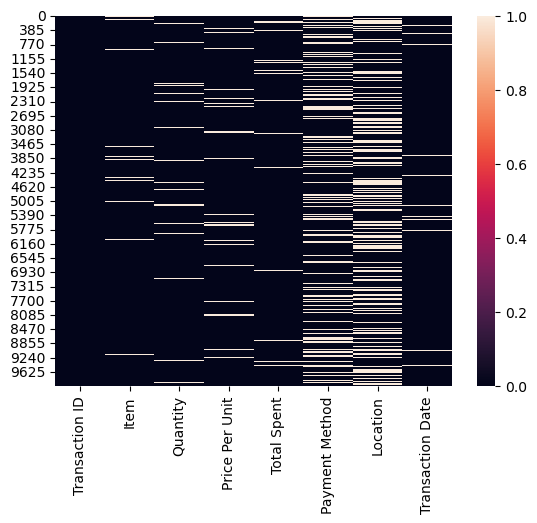

In [21]:
sns.heatmap(df.isnull())

# We drop rows with any missing values

In [5]:


df_cleaned=df.dropna()
df_cleaned.isna().sum()

Transaction ID      0
Item                0
Quantity            0
Price Per Unit      0
Total Spent         0
Payment Method      0
Location            0
Transaction Date    0
dtype: int64

# Handling Missing Values: Forward Fill & Backward Fill

# In some cases, we use forward fill  or backward fill  to handle missing data

In [29]:
df['Transaction ID']=df['Transaction ID'].fillna(method='bfill')
df['Transaction Date']=df['Transaction Date'].fillna(method='ffill')

df.isna().sum()

Transaction ID         0
Item                 333
Quantity             479
Price Per Unit       533
Total Spent          502
Payment Method      2579
Location            3265
Transaction Date       0
dtype: int64

# Filling Missing Data with Simple Imputer

# We use Simple Imputer from scikit-learn to automatically fill in missing values in the dataset.

In [33]:

from sklearn.impute import SimpleImputer
sd=SimpleImputer(strategy='most_frequent')
df[['Item', 'Payment Method', 'Location']]=sd.fit_transform(df[['Item', 'Payment Method', 'Location']])
df.isna().sum()

Transaction ID        0
Item                  0
Quantity            479
Price Per Unit      533
Total Spent         502
Payment Method        0
Location              0
Transaction Date      0
dtype: int64

In [35]:
si=SimpleImputer(strategy='mean')
df[['Price Per Unit','Quantity','Total Spent']]=si.fit_transform(df[['Price Per Unit','Quantity','Total Spent']])
df.isna().sum()

Transaction ID      0
Item                0
Quantity            0
Price Per Unit      0
Total Spent         0
Payment Method      0
Location            0
Transaction Date    0
dtype: int64

# Heatmap : No Missing Values Detected

# We plotted a heatmap to check for missing values, and the result shows that no missing data is present in the dataset.


<Axes: >

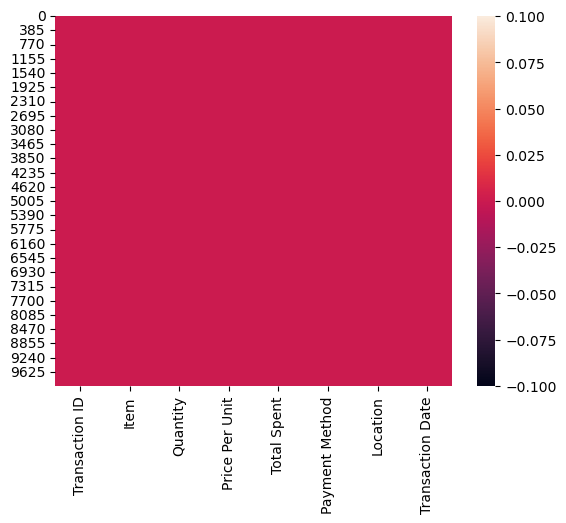

In [36]:
sns.heatmap(df.isnull())

<Axes: xlabel='Quantity'>

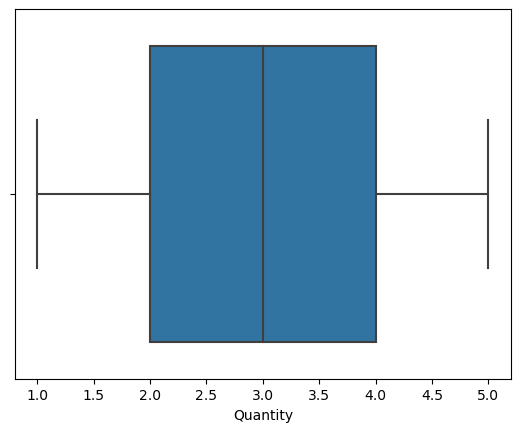

In [13]:
##  Boxplot of 'Quantity'

# A boxplot gives us a clear picture of the distribution of values in the `Quantity` column. It highlights:

sns.boxplot(x='Quantity', data=df)


<Axes: xlabel='Total Spent', ylabel='Count'>

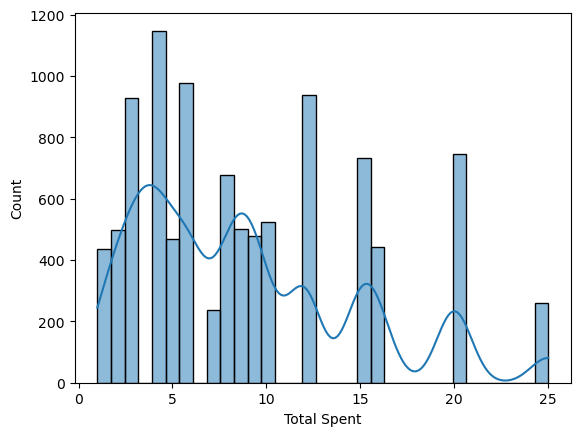

In [38]:
sns.histplot(x='Total Spent', data=df,kde=True)

# Detecting Outliers with IQR

# The Interquartile Range (IQR) is a statistical method used to identify outliers in a dataset.

In [43]:
q1=df['Total Spent'].quantile(0.25)
q3=df['Total Spent'].quantile(0.75)
IQR=q3-q1
print(IQR)


8.0


In [44]:
min_range=q1-(1.5*IQR)
max_range=q1+(1.5*IQR)

In [45]:
new_df=df['Total Spent']<=max_range

In [46]:
new_df

0       True
1       True
2       True
3       True
4       True
        ... 
9995    True
9996    True
9997    True
9998    True
9999    True
Name: Total Spent, Length: 10000, dtype: bool

# Feature Scaling

# Feature scaling is the process of transforming numerical features so they share a common scale. This helps machine learning models perform better, especially those sensitive to the magnitude of input values.


In [47]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[['Total Spent','Price Per Unit']])
df_scaled

array([[-8.40789465e-01, -7.63746448e-01],
       [ 5.25139502e-01,  4.02105902e-02],
       [ 3.03297158e-16, -1.56770349e+00],
       ...,
       [-1.57824981e-01, -7.63746448e-01],
       [-1.01153059e+00,  0.00000000e+00],
       [ 5.25139502e-01,  8.44167629e-01]])

In [14]:
df.to_csv("cleaned_dataset.csv", index=False)


# Conclusion

# The dataset has been cleaned successfully by handling missing values, 
# fixing data types, removing duplicates, and scaling features. 
# It's  now ready for analysis or modeling.
